In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 1. Create Simulation Data

We create simulative sale data which begin in 2021-01-01 and have 1000 days. In this data, there are a time increasing trend, monthly trend and unexpected error.

In [2]:
sale = 1000
sales = []
for day in range(180):
    sales.append(sale)
    sale = sale + np.random.random() * 5 + np.sin(math.pi/180 * day * (360 / 7)) * 20 + np.random.normal() * 20
days = pd.date_range(start ='2021/1/1', periods=180, freq='D')
df_sales = pd.DataFrame(data={'sale': sales}, index=days)

## Trend plot

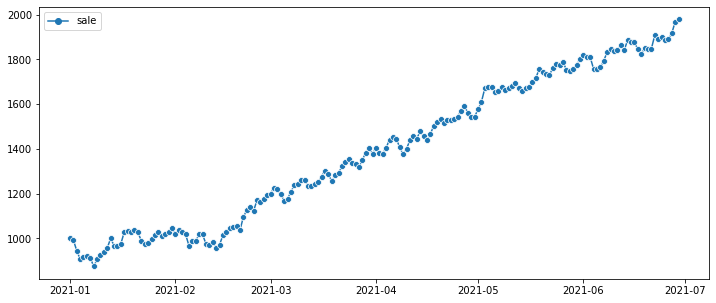

In [3]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df_sales, markers=True)
plt.show()

In [4]:
df_sales.to_excel('test.xlsx', index=0)

# 2. expanding, sma, ema

In [5]:
def ema_accurate(df_series, span):
    df_ema_accurate = pd.Series([np.nan] * (span - 1))
    df_ema_accurate = df_ema_accurate.append(pd.Series(df_series[:span].mean()).append(df_series[span:]).ewm(span=span, adjust=False).mean())
    df_ema_accurate = df_ema_accurate.to_list()
    return df_ema_accurate

In [6]:
df_sales['sale_expanding'] = df_sales.sale.expanding().mean()
df_sales['sale_sma'] = df_sales.sale.rolling(window=7, min_periods=1).mean()
df_sales['sale_ema'] = df_sales.sale.ewm(span=12, adjust=False).mean()
df_sales['sale_ema_accurate'] = ema_accurate(df_series=df_sales['sale'], span=12)

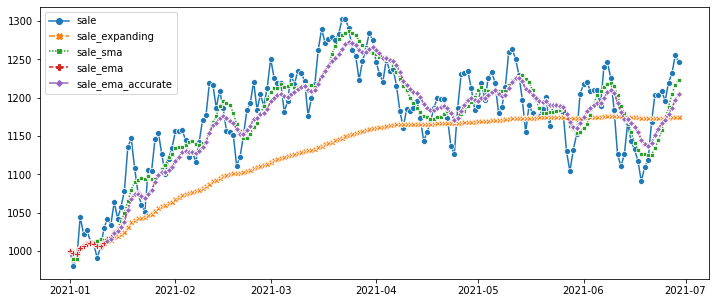

In [17]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df_sales.loc[:, ['sale', 'sale_expanding', 'sale_sma', 'sale_ema', 'sale_ema_accurate']], markers=True)
plt.show()

## The difference between ema and ema_accurate

Look as below graph, we could find that the difference between ema and real ema is existing. However, after one month, the difference almost disappear.

In [18]:
cal_error = pd.DataFrame(data=df_sales.sale_ema_accurate-df_sales.sale_ema, columns=['error'])

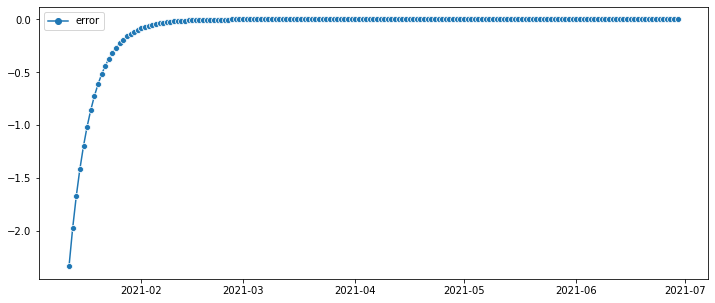

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(data = cal_error, markers=True)
plt.show()

## Ref  
https://rich01.com/what-is-moving-average-line/  
https://stackoverflow.com/questions/45370666/what-are-pandas-expanding-window-functions  
https://xuyu.in/807.html  
https://www.investopedia.com/terms/e/ema.asp  
https://www.investopedia.com/ask/answers/122314/  what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp  
https://sciencing.com/calculate-exponential-moving-averages-8221813.html  